# Lecture 5 - Principal Component Analysis

## Giới thiệu

Trong bài học trước, chúng ta đã xem xét phương pháp đầu tiên dựa trên mô hình để kỹ thuật hóa đặc trưng: **phân cụm (clustering)**. Trong bài học này, chúng ta sẽ xem xét phương pháp tiếp theo: **phân tích thành phần chính (Principal Component Analysis - PCA)**. 

Cũng giống như **phân cụm** là một cách phân vùng tập dữ liệu dựa trên sự gần gũi, bạn có thể coi **PCA** như một cách phân vùng sự biến thiên trong dữ liệu. **PCA là một công cụ tuyệt vời giúp bạn khám phá các mối quan hệ quan trọng trong dữ liệu** và cũng có thể được sử dụng để tạo ra các đặc trưng có tính thông tin hơn.

> *Lưu ý kỹ thuật:* PCA thường được áp dụng cho dữ liệu **đã được chuẩn hóa** ([standardized](https://www.kaggle.com/alexisbcook/scaling-and-normalization)). Khi dữ liệu được chuẩn hóa, thuật ngữ *"biến thiên"* (variation) có nghĩa là *"tương quan"* (correlation). Trong khi đó, nếu dữ liệu chưa được chuẩn hóa, *"biến thiên"* có nghĩa là *"hiệp phương sai"* (covariance). Trong khóa học này, **tất cả dữ liệu sẽ được chuẩn hóa trước khi áp dụng PCA**.

## Phân tích thành phần chính (Principal Component Analysis - PCA)

Tập dữ liệu [*Abalone*](https://www.kaggle.com/rodolfomendes/abalone-dataset) chứa các phép đo vật lý được thu thập từ hàng nghìn con **bào ngư Tasmania** (abalone là một loài sinh vật biển giống như ngao hoặc hàu). 

Chúng ta sẽ chỉ xem xét hai đặc trưng: **'Height'** (chiều cao) và **'Diameter'** (đường kính) của vỏ bào ngư.

Bạn có thể hình dung rằng trong tập dữ liệu này có những **"trục biến thiên"** mô tả cách mà các con bào ngư có xu hướng khác nhau. **Các trục này xuất hiện dưới dạng các đường vuông góc chạy dọc theo các chiều tự nhiên của dữ liệu, mỗi trục tương ứng với một đặc trưng ban đầu.**

<figure style="padding: 1em;">
<img src="../_static/images/rr8NCDy.png" width=300 alt="">
<figcaption style="text-align: center; font-style: italic"><center>
</center></figcaption>
</figure>

Thường thì chúng ta có thể đặt tên cho các trục biến thiên này. Trục dài hơn có thể được gọi là thành phần "Kích thước" (Size): chiều cao nhỏ và đường kính nhỏ (góc dưới bên trái) so với chiều cao lớn và đường kính lớn (góc trên bên phải). Trục ngắn hơn có thể được gọi là thành phần "Hình dạng" (Shape): chiều cao nhỏ và đường kính lớn (hình dẹt) so với chiều cao lớn và đường kính nhỏ (hình tròn).

Lưu ý rằng thay vì mô tả bào ngư bằng `'Chiều cao'` (`Height`) và `'Đường kính'` (`Diameter`), chúng ta hoàn toàn có thể mô tả chúng bằng `'Kích thước'` (`Size`) và `'Hình dạng'` (`Shape`). Thực tế, đây chính là toàn bộ ý tưởng của PCA: thay vì mô tả dữ liệu bằng các đặc trưng ban đầu, chúng ta mô tả nó bằng các trục biến thiên của nó. Các trục biến thiên này trở thành các đặc trưng mới.

<figure style="padding: 1em;">
<img src="../_static/images/XQlRD1q.png" width=600 alt="">
<figcaption style="text-align: center; font-style: italic"><center>Các thành phần chính trở thành các đặc trưng mới bằng cách xoay tập dữ liệu trong không gian đặc trưng.</center></figcaption>
</figure>

Các đặc trưng mới mà PCA tạo ra thực chất chỉ là các tổ hợp tuyến tính (tổng có trọng số) của các đặc trưng ban đầu:

```python
df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]
df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]
```

Các đặc trưng mới này được gọi là **các thành phần chính** (principal components) của dữ liệu. Bản thân các trọng số được gọi là **hệ số tải** (loadings). Số lượng thành phần chính sẽ bằng số lượng đặc trưng trong tập dữ liệu ban đầu: nếu chúng ta sử dụng mười đặc trưng thay vì hai, chúng ta sẽ có mười thành phần.

Hệ số tải của một thành phần cho chúng ta biết sự biến thiên mà nó thể hiện thông qua dấu và độ lớn của các trọng số:

| Đặc trưng \ Thành phần | Kích thước (PC1) | Hình dạng (PC2) |
|------------------------|------------------|------------------|
| Chiều cao             | 0.707            | 0.707            |
| Đường kính            | 0.707            | -0.707           |

Bảng hệ số tải này cho chúng ta biết rằng trong thành phần `Kích thước`, `Chiều cao` và `Đường kính` thay đổi theo cùng một hướng (cùng dấu), nhưng trong thành phần `Hình dạng`, chúng thay đổi theo hướng ngược nhau (dấu trái ngược). Trong mỗi thành phần, các hệ số tải có độ lớn như nhau, do đó các đặc trưng đóng góp như nhau trong cả hai thành phần.

PCA cũng cho chúng ta biết *lượng* biến thiên trong mỗi thành phần. Từ hình minh họa, có thể thấy rằng có nhiều biến thiên hơn dọc theo thành phần `Kích thước` so với thành phần `Hình dạng`. PCA làm rõ điều này thông qua **phần trăm phương sai được giải thích** của mỗi thành phần.

<figure style="padding: 1em;">
<img src="../_static/images/xWTvqDA.png" width=600 alt="">
<figcaption style="text-align: center; font-style: italic"><center>Kích thước chiếm khoảng 96% và Hình dạng chiếm khoảng 4% phương sai giữa Chiều cao và Đường kính.</center></figcaption>
</figure>

Thành phần `Kích thước` nắm bắt phần lớn sự biến thiên giữa `Chiều cao` và `Đường kính`. Tuy nhiên, điều quan trọng cần nhớ là lượng phương sai trong một thành phần không nhất thiết phản ánh độ tốt của nó như một yếu tố dự đoán: điều đó còn phụ thuộc vào mục tiêu mà bạn đang cố gắng dự đoán.

## PCA trong Kỹ thuật Đặc trưng

Có hai cách sử dụng PCA trong kỹ thuật đặc trưng.

Cách thứ nhất là sử dụng nó như một phương pháp mô tả. Vì các thành phần cho chúng ta biết về sự biến thiên, bạn có thể tính điểm MI (Mutual Information) cho các thành phần và xác định loại biến thiên nào dự đoán tốt nhất mục tiêu của bạn. Điều này có thể gợi ý cách tạo ra các đặc trưng mới — chẳng hạn như tạo một tích số giữa `'Chiều cao'` và `'Đường kính'` nếu `'Kích thước'` quan trọng, hoặc tạo một tỷ số giữa `'Chiều cao'` và `'Đường kính'` nếu `'Hình dạng'` quan trọng. Bạn thậm chí có thể thử phân cụm dựa trên một hoặc nhiều thành phần có điểm cao.

Cách thứ hai là sử dụng trực tiếp các thành phần làm đặc trưng. Vì các thành phần phơi bày cấu trúc biến thiên của dữ liệu một cách trực tiếp, chúng thường có thể chứa nhiều thông tin hơn so với các đặc trưng gốc. Một số trường hợp sử dụng bao gồm:
- **Giảm chiều dữ liệu**: Khi các đặc trưng của bạn có tính dư thừa cao (*đa cộng tuyến* - multicollinearity), PCA sẽ phân tách sự dư thừa này vào một hoặc nhiều thành phần có phương sai gần bằng không, mà bạn có thể loại bỏ do chúng chứa rất ít hoặc không có thông tin.
- **Phát hiện bất thường**: Sự biến thiên bất thường, không rõ ràng từ các đặc trưng gốc, thường sẽ xuất hiện trong các thành phần có phương sai thấp. Các thành phần này có thể rất hữu ích trong các bài toán phát hiện bất thường hoặc điểm ngoại lai.
- **Giảm nhiễu**: Một tập hợp các cảm biến đo lường thường có chung một mức nhiễu nền. PCA đôi khi có thể thu thập tín hiệu (có thông tin) vào một số ít đặc trưng, trong khi để nhiễu nằm riêng lẻ, do đó cải thiện tỷ lệ tín hiệu trên nhiễu.
- **Loại bỏ tương quan**: Một số thuật toán học máy gặp khó khăn khi làm việc với các đặc trưng có mức tương quan cao. PCA chuyển đổi các đặc trưng có tương quan thành các thành phần không tương quan, giúp thuật toán làm việc dễ dàng hơn.

PCA thực chất cung cấp cho bạn quyền truy cập trực tiếp vào cấu trúc tương quan của dữ liệu. Bạn chắc chắn sẽ nghĩ ra những ứng dụng riêng của mình!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>Thực hành tốt nhất khi sử dụng PCA</strong><br>
Có một số điều cần lưu ý khi áp dụng PCA:
<ul>
<li> PCA chỉ hoạt động với các đặc trưng dạng số, chẳng hạn như số đo liên tục hoặc số đếm.
<li> PCA nhạy cảm với tỷ lệ thang đo. Thông thường, bạn nên chuẩn hóa dữ liệu trước khi áp dụng PCA, trừ khi có lý do chính đáng để không làm vậy.
<li> Hãy cân nhắc loại bỏ hoặc giới hạn các điểm ngoại lai, vì chúng có thể gây ảnh hưởng đáng kể đến kết quả.
</ul>
</blockquote>

## Ví dụ - Ô tô năm 1985

Trong ví dụ này, chúng ta sẽ quay lại tập dữ liệu [*Ô tô*](https://www.kaggle.com/toramky/automobile-dataset) và áp dụng PCA, sử dụng nó như một kỹ thuật mô tả để khám phá các đặc trưng. Chúng ta sẽ xem xét các trường hợp sử dụng khác trong bài tập.

Cell ẩn này tải dữ liệu và định nghĩa các hàm `plot_variance` và `make_mi_scores`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("autos.csv")

Chúng tôi đã chọn bốn đặc trưng bao quát một loạt các tính chất. Mỗi đặc trưng này cũng có điểm MI (Mutual Information) cao với mục tiêu, `price`. Chúng tôi sẽ chuẩn hóa dữ liệu vì các đặc trưng này không có cùng một thang đo tự nhiên.

In [2]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

Bây giờ, chúng ta có thể huấn luyện bộ ước lượng `PCA` của scikit-learn và tạo các thành phần chính. Dưới đây là vài hàng đầu tiên của tập dữ liệu đã được biến đổi.

In [3]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


Sau khi huấn luyện, đối tượng `PCA` chứa các hệ số tải trong thuộc tính `components_`. (Thật không may, thuật ngữ trong PCA không thống nhất. Chúng tôi tuân theo quy ước gọi các cột đã biến đổi trong `X_pca` là *thành phần*, mặc dù thông thường chúng không có tên riêng.) Chúng tôi sẽ đóng gói các hệ số tải vào một dataframe.

In [4]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


Nhớ rằng dấu và độ lớn của hệ số tải của một thành phần cho chúng ta biết loại biến thiên mà nó nắm bắt được. Thành phần đầu tiên (`PC1`) cho thấy sự tương phản giữa các phương tiện lớn, mạnh mẽ nhưng tiêu hao nhiên liệu nhiều, và các phương tiện nhỏ hơn, tiết kiệm nhiên liệu hơn. Chúng ta có thể gọi đây là trục "Sang trọng/Kinh tế" (*Luxury/Economy*). Hình minh họa tiếp theo cho thấy rằng bốn đặc trưng được chọn của chúng ta chủ yếu biến thiên theo trục Sang trọng/Kinh tế.

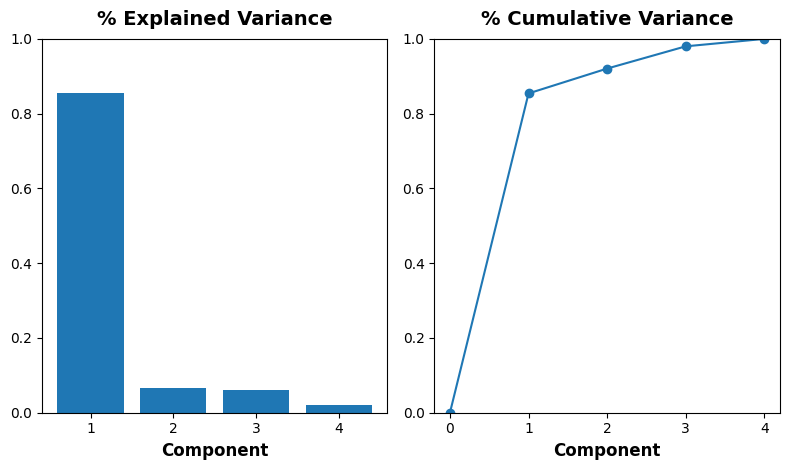

In [5]:
# Look at explained variance
plot_variance(pca);

Hãy cùng xem xét điểm MI của các thành phần. Không có gì ngạc nhiên khi `PC1` chứa nhiều thông tin quan trọng, mặc dù các thành phần còn lại, dù có phương sai nhỏ, vẫn có mối quan hệ đáng kể với `price`. Việc phân tích các thành phần này có thể hữu ích để tìm ra những mối quan hệ chưa được phản ánh bởi trục chính Sang trọng/Kinh tế.

In [6]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.013540
PC2    0.378569
PC3    0.306677
PC4    0.203779
Name: MI Scores, dtype: float64

Thành phần thứ ba thể hiện sự tương phản giữa `horsepower` và `curb_weight` — dường như phản ánh sự khác biệt giữa xe thể thao và xe wagon.

In [7]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


Để thể hiện sự tương phản này, chúng ta sẽ tạo một đặc trưng tỷ lệ mới:

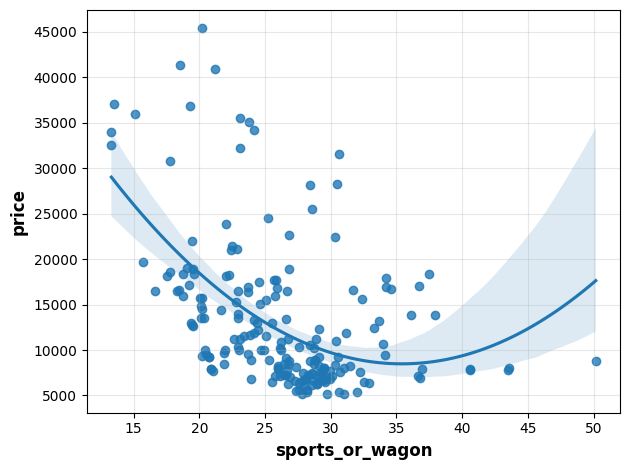

In [8]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);
plt.grid(alpha=0.3)

## Đến lượt bạn

[**Cải thiện tập hợp đặc trưng của bạn**](https://www.kaggle.com/kernels/fork/14393921) bằng cách phân tích sự biến thiên trong *Ames Housing* và sử dụng các thành phần chính để phát hiện điểm ngoại lai.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/feature-engineering/discussion) to chat with other learners.*